In [1]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly_helper import log10, get_log10_ticks

pio.templates.default = 'plotly_white+presentation'
pio.renderers.default = 'plotly_mimetype+notebook_connected+png'
px.defaults.color_continuous_scale = px.colors.sequential.Blugrn
px.defaults.color_discrete_sequence = px.colors.qualitative.Dark24

In [2]:
tips = px.data.tips()

## Log-scale

Plotly.js doesn't support log-scale bin size. Track [this issue](https://github.com/plotly/plotly.js/issues/1844)

In [3]:
tips.loc[240, "total_bill"] = -27. # Introduce a negative value for testing log scale.

In [4]:
tips['log10_total_bill'] = log10(tips['total_bill'])

In [5]:
ticktext, tickvals = get_log10_ticks(tips['total_bill'])

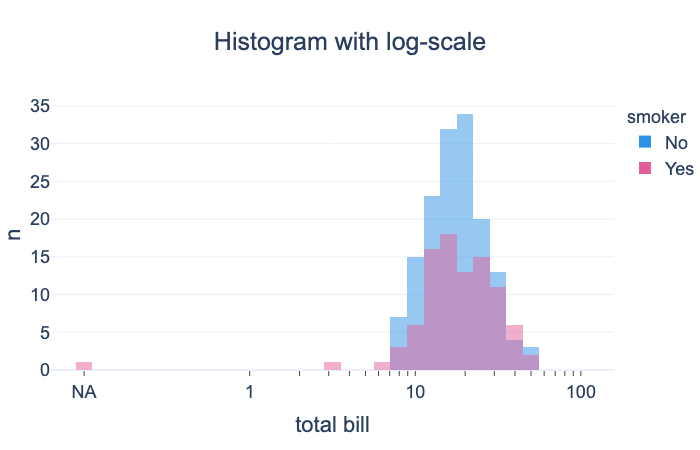

In [6]:
fig = px.histogram(tips, x="log10_total_bill", color="smoker", nbins=30,
hover_data=dict(log10_total_bill=False),
range_x=[tickvals.min() - 0.2, tickvals.max() + 0.2],
title="Histogram with log-scale", barmode="overlay")
fig.update_xaxes(ticks="outside", ticktext=ticktext, tickvals=tickvals, tickangle=0)
fig.update_layout(xaxis_title="total bill", yaxis_title="n", title_x=0.5, margin=dict(l=0))
fig.show()